# 1. Libraries and data importation

In [43]:
#Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#Preprocessing
from sklearn.preprocessing import RobustScaler


#Machine Learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif

#Metrics
from sklearn.metrics import f1_score, recall_score, confusion_matrix, classification_report, precision_recall_curve
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
#data importation
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# 2. Quick data exploration and cleaning

In [3]:
#quick data visualization
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

In [4]:
data.shape

(7043, 21)

The dataset gathers data from 7043 customers described by 21 attributes.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


We can notice some problems:

the SeniorCitizen attribute is considered as a numerical variable whereas it is a cathegory variable.

The TotalCharges attribute is considered as an object whereas it is a numerical variable.

In [10]:
#Convert SeniorCitizen to object
data['SeniorCitizen']=data['SeniorCitizen'].apply(str)

#convert TotalCharges to float
data['TotalCharges']=data['TotalCharges'].replace({" ":'0'})
data['TotalCharges']=data['TotalCharges'].astype(float)

In [11]:
data['TotalCharges'].unique()

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [13]:
#delete unuseful column
data=data.drop('customerID', axis=1)
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [16]:
data.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Separate quantitative and qualitative features

In [25]:
numeric_features=data[['tenure','MonthlyCharges','TotalCharges']]
nominal_features=data[['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines',
                     'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
                     'StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']]

In [26]:
numeric_features

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.50
7039,72,103.20,7362.90
7040,11,29.60,346.45
7041,4,74.40,306.60


In [27]:
nominal_features

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check
7039,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic)
7040,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check
7041,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check


Quick exploration on numeric features

In [28]:
#Description of numericall variables
data.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


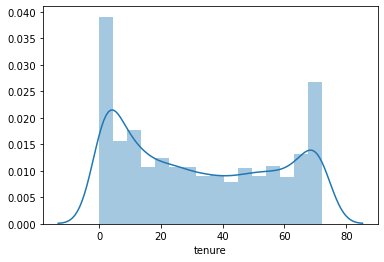

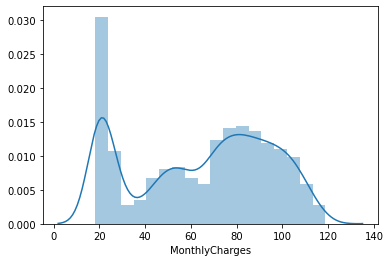

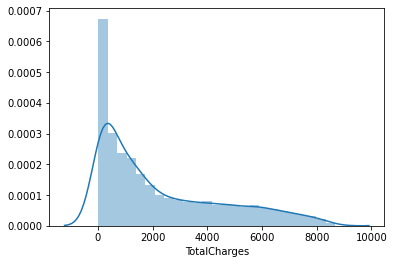

In [33]:
for col in numeric_features:
    plt.figure()
    sns.distplot(data[col])
    
    



We can notice that none of the quantitative variables are normally distributed.

Quick exploration on the nominal features + target

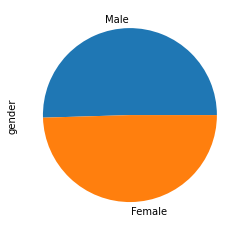

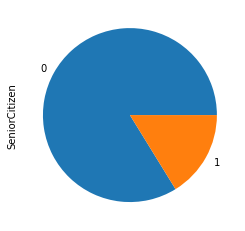

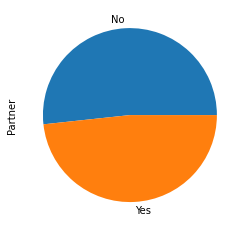

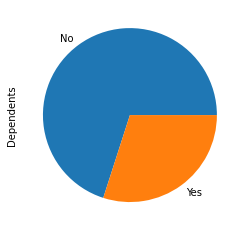

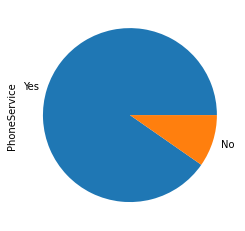

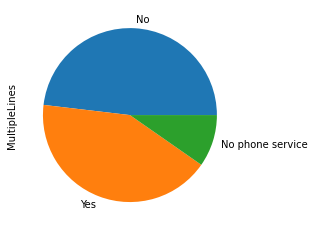

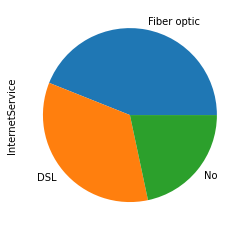

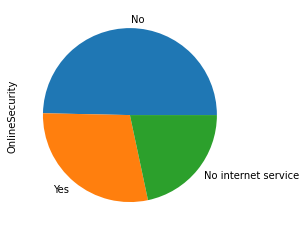

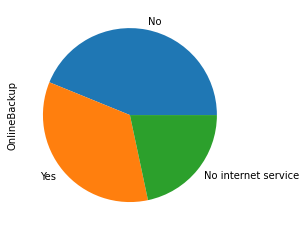

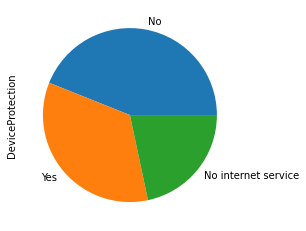

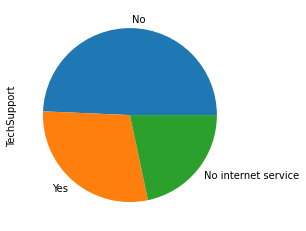

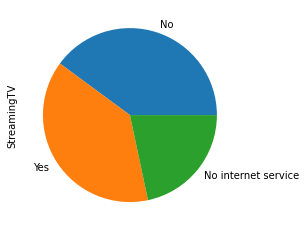

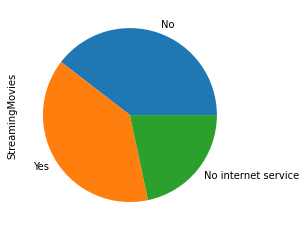

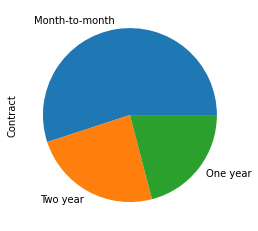

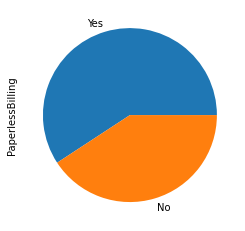

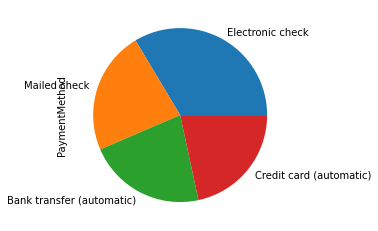

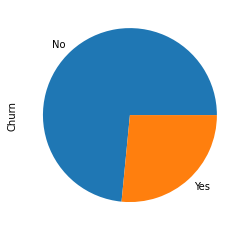

In [31]:
for col in data.select_dtypes('object'):
    plt.figure()
    data[col].value_counts().plot.pie()

#Demographic info

Gender : balanced distribution

SeniorCitizen : unbalanced variable with only 20% of SeniorCitizen

Partner : balanced distribution

#Services

MultipleLines : balanced distribution between Yes and No. A minority of customers don't have a phone service

InternetService : balanced distribution between DSL, Fiber optic and no

OnlineSecurity : balanced distribution between Yes, No and no internet service (but we can notice a majority of No)

OnlineBackup : balanced distribution between Yes, No and no internet service

DeviceProtection : balanced distribution between Yes, No and no internet service (but we can notice a majority of No)

TechSupport : balanced distribution between Yes, No and no internet service (but we can notice a majority of No)

StreamingTV : balanced distribution between Yes, No and no internet service

StreamingMovies : balanced distribution between Yes, No and no internet service

Even if these variables are equally distributed, we can note that the answer "No" and the answer "no internet/phone service" mean the same thing => The customer did not subscribe to the service. So there is a minority of customers subscribed for each service.

#Customer account information

Contract : the majority of clients have a month-to-month contract

PaperlessBilling : majority of paperless billing

PaymentMethod : balanced distribution between Credit card (automatic), Electronic check, Bank transfert (automatic) and Mailed check

#Target

Churn : a quarter of the clients are in churn

Explore relations between variables and target

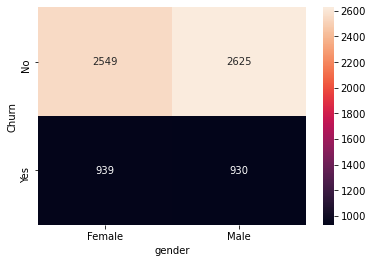

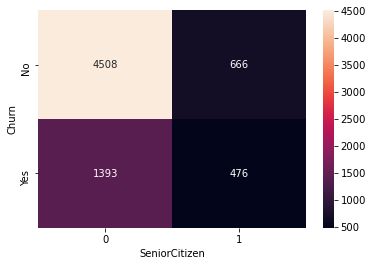

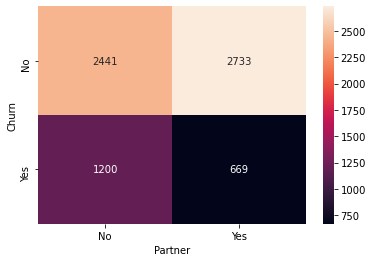

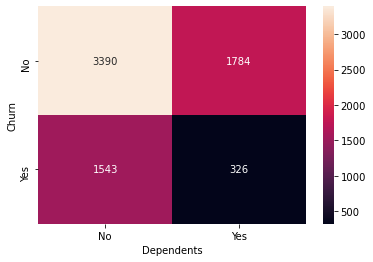

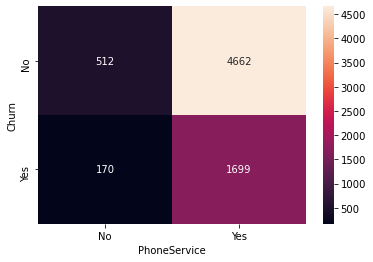

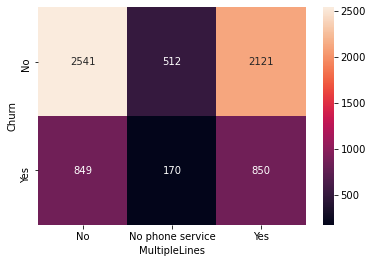

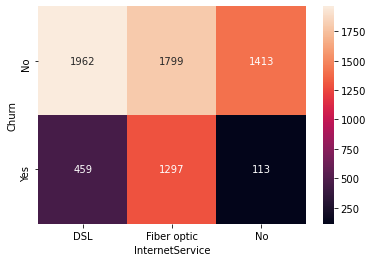

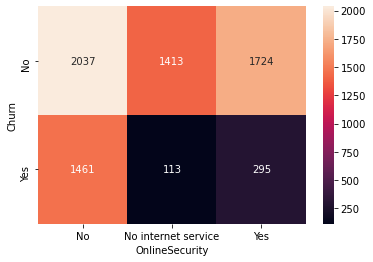

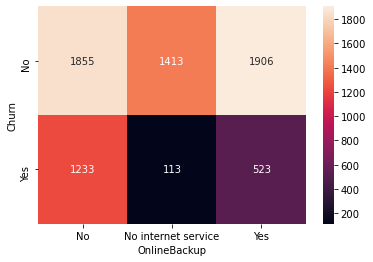

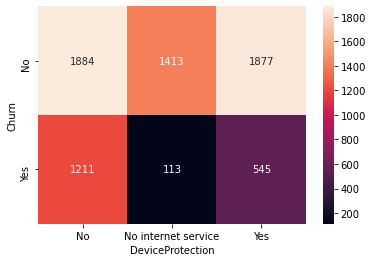

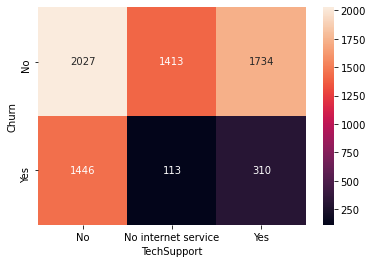

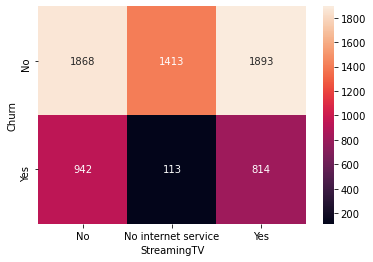

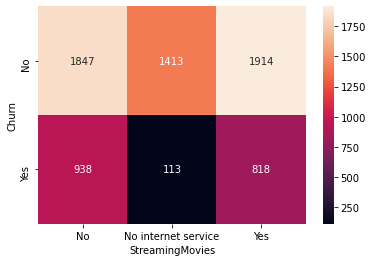

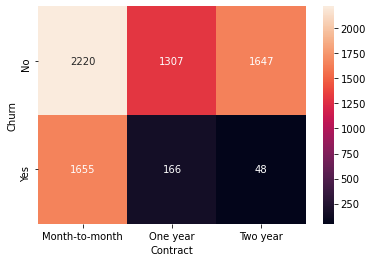

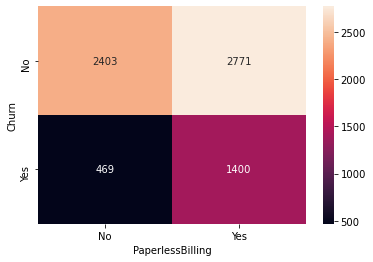

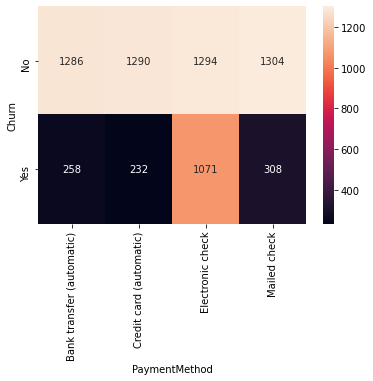

In [34]:
for col in nominal_features :
    plt.figure()
    sns.heatmap(pd.crosstab(data['Churn'], data[col]), annot=True, fmt='d')

Countplot nominal features / target

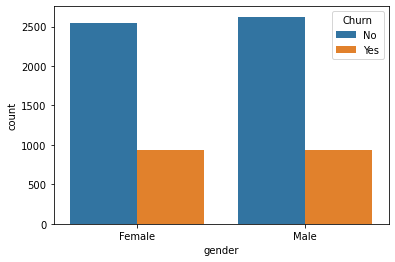

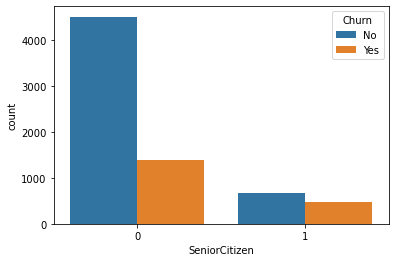

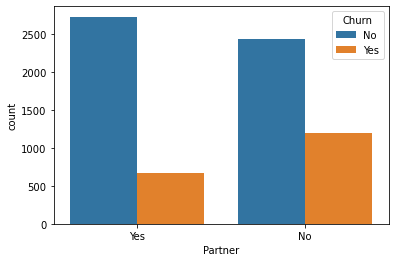

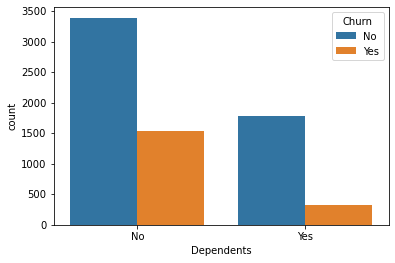

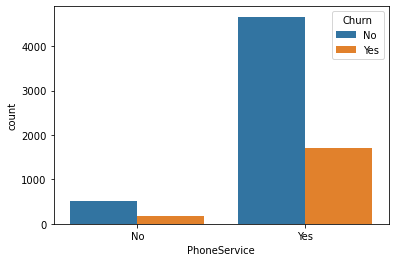

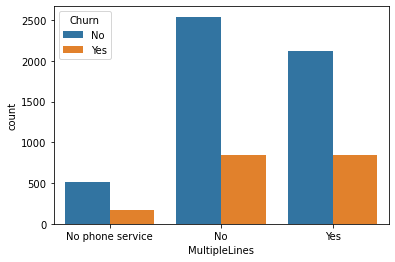

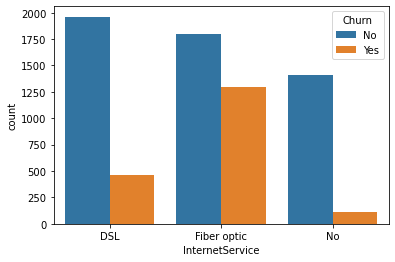

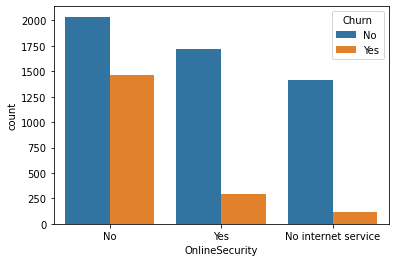

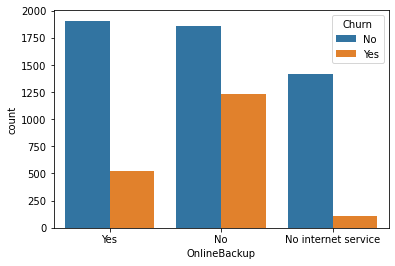

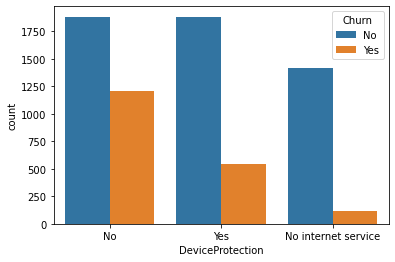

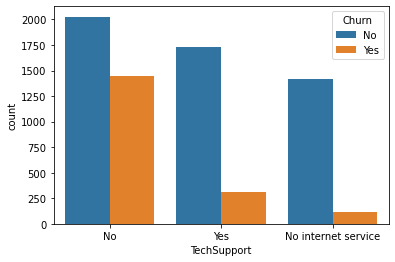

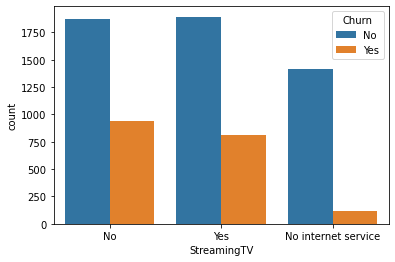

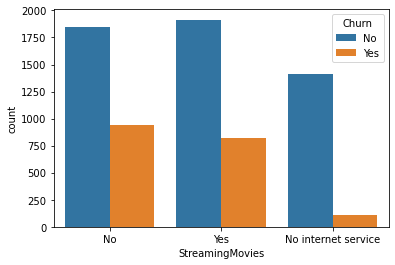

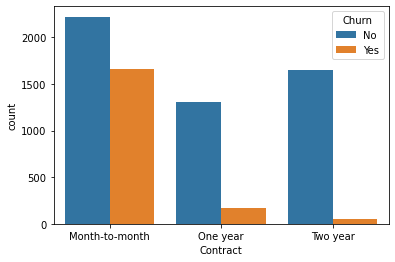

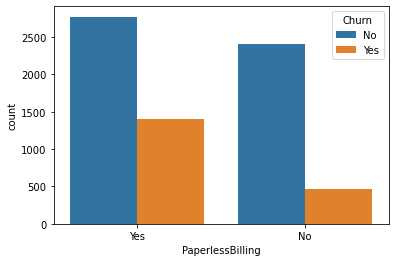

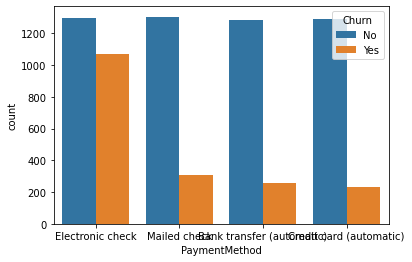

In [36]:
for col in nominal_features:
    plt.figure()
    sns.countplot(x=col, hue='Churn',data=data)

We can notice characteristics of churn customers :

Fiber optic

month to month contract

Paperless billing

Electronic check

Timechart : churn distribution for each numeric features

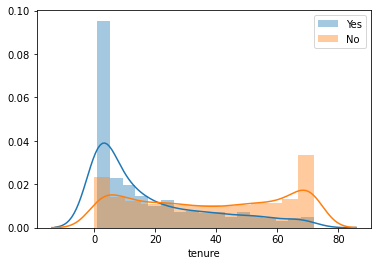

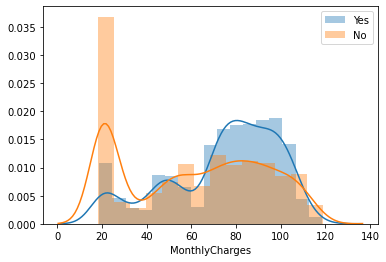

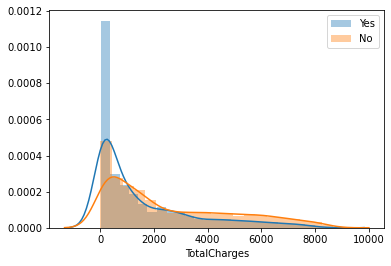

In [38]:
churn_df = data[data['Churn'] == 'Yes']
noChurn_df = data[data['Churn'] == 'No']

for col in numeric_features:
    plt.figure()
    sns.distplot(churn_df[col], label='Yes')
    sns.distplot(noChurn_df[col], label='No')
    plt.legend()

# 3. Preprocessing

In [39]:
df=data.copy()

In [44]:
trainset, testset =train_test_split(df, test_size=0.2, random_state=0)

In [46]:
trainset['Churn'].value_counts(normalize=True)

No     0.733582
Yes    0.266418
Name: Churn, dtype: float64

In [47]:
testset['Churn'].value_counts(normalize=True)

No     0.738822
Yes    0.261178
Name: Churn, dtype: float64

The churn proportions are similar between the train and the test set.

# Encoding

In [48]:
#encoding for our services columns

#columns for label endoding 
labelEndoding_cols =  ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling','Churn']

#columns for oneHot encoding
oneHot_cols = ['InternetService','Contract', 'PaymentMethod']

In [49]:
#create encoding function
def encoding(df):
    
    code = {'Male':1,
        'Female':0,
        '1':1,
        '0':0,
        'Yes':1,
       'No':0,
       'No internet service':0,
       'No phone service':0}
        
    for col in df[labelEndoding_cols].columns:
        df.loc[:,col] = df[col].map(code)

    df = pd.get_dummies(df,columns=['InternetService'],prefix='InternetService')
    df = pd.get_dummies(df,columns=['Contract'],prefix='Contract')
    df = pd.get_dummies(df,columns=['PaymentMethod'],prefix='PaymentMethod')
    
    return df

Preprocessing function

In [50]:
def preprocessing(df):
    
    df = encoding(df)
    
    X = df.drop('Churn',axis=1)
    y = df['Churn']
    
    print(y.value_counts())
    
    return X,y

In [51]:
X_train, y_train = preprocessing(trainset)

0    4133
1    1501
Name: Churn, dtype: int64


In [52]:
X_test, y_test = preprocessing(testset)

0    1041
1     368
Name: Churn, dtype: int64


Evaluation function

In [53]:
def evaluation(name,model):
    
    model.fit(X=X_train, y=y_train)
    ypred = model.predict(X_test)
    
    print(name)
    print(confusion_matrix(y_test,ypred))
    print(classification_report(y_test,ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train, 
                                               cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1,1,10))
    
    
    plt.figure(figsize=(12,8))
    plt.title(name)
    plt.plot(N,train_score.mean(axis=1), label='train score')
    plt.plot(N,val_score.mean(axis=1), label='val score')

#Models
Models to test :

Decision Tree

Random Forest

Logistic Regression

AdaBoost

SVM

KNN

In [54]:
preprocessor = make_pipeline(SelectKBest(f_classif,k=8))

In [55]:
DecisionTree = make_pipeline(preprocessor,DecisionTreeClassifier(random_state=0))
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
LR = make_pipeline(preprocessor,LogisticRegression(random_state=0))
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))
SVM = make_pipeline(preprocessor,StandardScaler(), SVC(random_state=0))
KNN = make_pipeline(preprocessor,StandardScaler(), KNeighborsClassifier())

In [56]:
list_of_models = [DecisionTree,RandomForest,LogisticRegression, AdaBoost, SVM, KNN]

Model Evaluation

In [57]:
dict_of_models = {'DecisionTree': DecisionTree,
                 'RandomForest': RandomForest,
                 'LR': LR,
                 'AdaBoost': AdaBoost,
                 'SVM': SVM,
                 'KNN': KNN
                 }

DecisionTree
[[851 190]
 [192 176]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1041
           1       0.48      0.48      0.48       368

    accuracy                           0.73      1409
   macro avg       0.65      0.65      0.65      1409
weighted avg       0.73      0.73      0.73      1409

RandomForest
[[902 139]
 [185 183]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1041
           1       0.57      0.50      0.53       368

    accuracy                           0.77      1409
   macro avg       0.70      0.68      0.69      1409
weighted avg       0.76      0.77      0.76      1409

LR
[[938 103]
 [183 185]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1041
           1       0.64      0.50      0.56       368

    accuracy                           0.80      1409
   macro avg       0.74      0

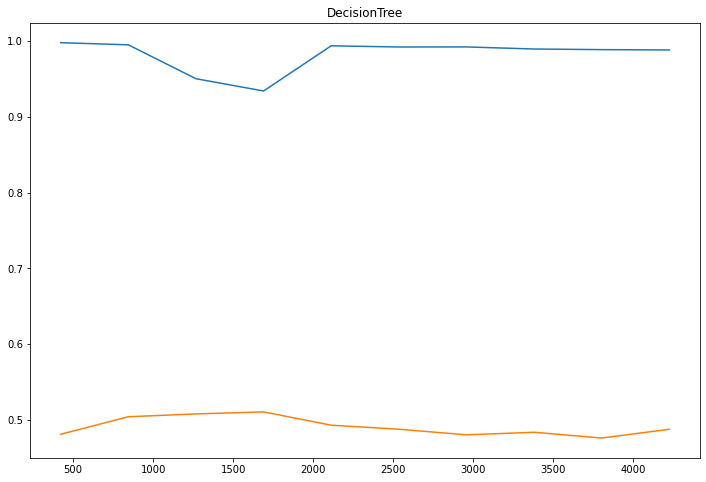

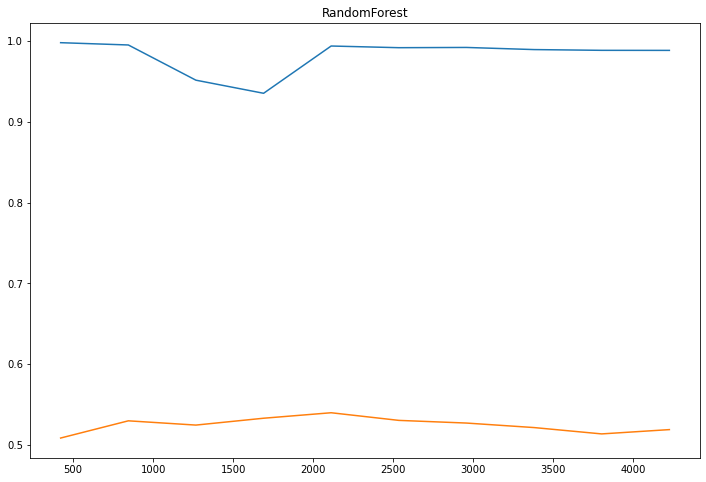

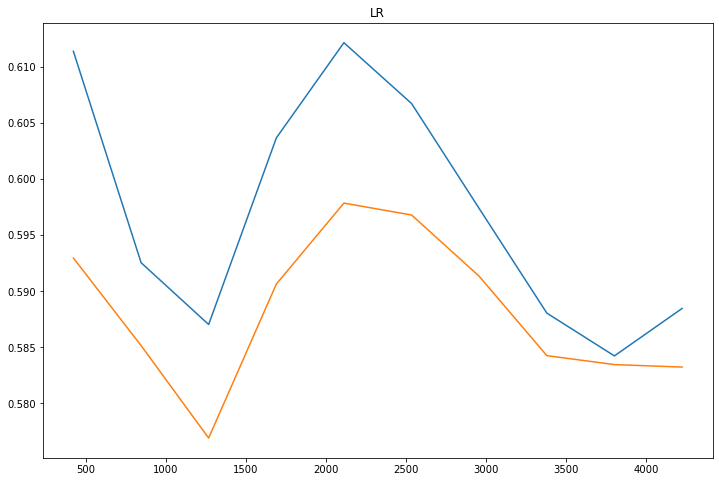

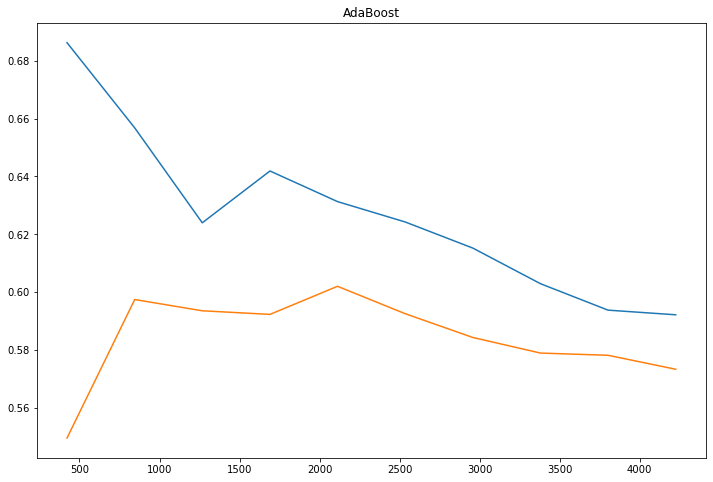

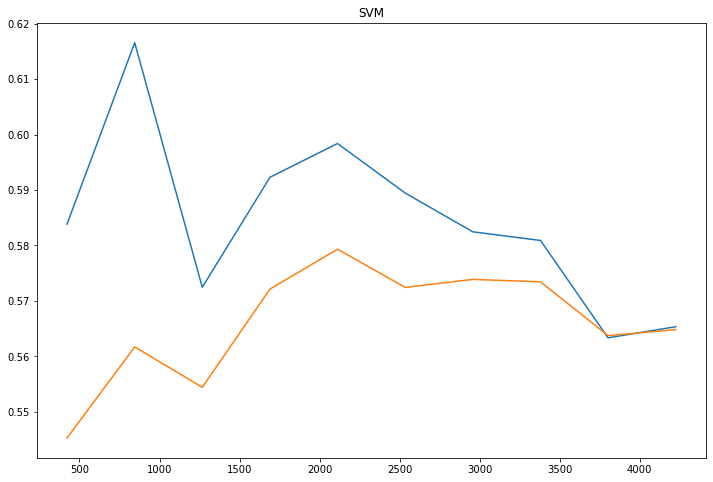

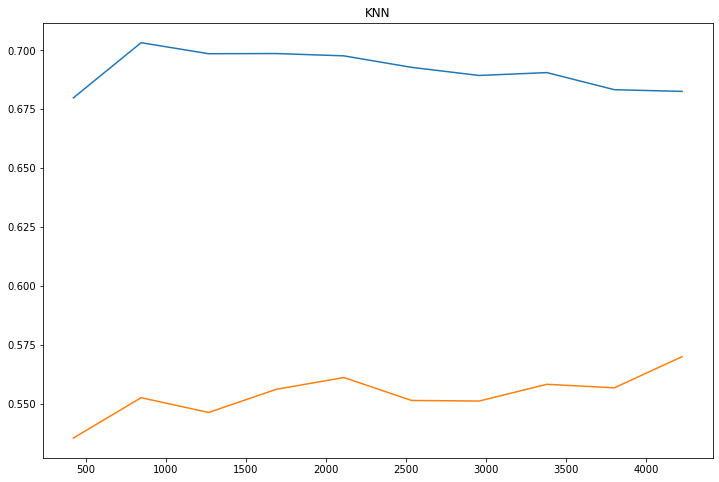

In [58]:
for name, model in dict_of_models.items():
    evaluation(name,model)

Decision Tree and Random Forest are overfeating. After analyzing the results, we will focus on the Logistic Regression, KNN, SVM and AdaBoost models.

Logistic Regression Optimization

In [59]:
LR.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'pipeline', 'logisticregression', 'pipeline__memory', 'pipeline__steps', 'pipeline__verbose', 'pipeline__selectkbest', 'pipeline__selectkbest__k', 'pipeline__selectkbest__score_func', 'logisticregression__C', 'logisticregression__class_weight', 'logisticregression__dual', 'logisticregression__fit_intercept', 'logisticregression__intercept_scaling', 'logisticregression__l1_ratio', 'logisticregression__max_iter', 'logisticregression__multi_class', 'logisticregression__n_jobs', 'logisticregression__penalty', 'logisticregression__random_state', 'logisticregression__solver', 'logisticregression__tol', 'logisticregression__verbose', 'logisticregression__warm_start'])

In [60]:
hyper_params_lr = {
    'logisticregression__penalty':['l1', 'l2', 'elasticnet'],        # l1 is Lasso, l2 is Ridge
    'logisticregression__C': np.arange(1e-05, 3, 0.1),
}


In [61]:
grid_lr = GridSearchCV(LR,hyper_params_lr,scoring='recall', cv=4)

grid_lr.fit(X_train,y_train)

print(grid_lr.best_params_)

y_pred = grid_lr.predict(X_test)

{'logisticregression__C': 1.30001, 'logisticregression__penalty': 'l2'}


Logistic Regression
[[936 105]
 [181 187]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1041
           1       0.64      0.51      0.57       368

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409



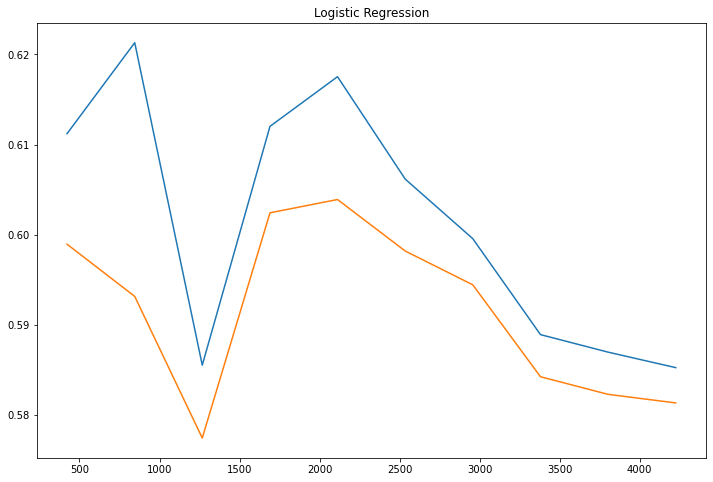

In [62]:
evaluation('Logistic Regression',grid_lr.best_estimator_)

SVM Optimization

In [63]:
SVM.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'pipeline', 'standardscaler', 'svc', 'pipeline__memory', 'pipeline__steps', 'pipeline__verbose', 'pipeline__selectkbest', 'pipeline__selectkbest__k', 'pipeline__selectkbest__score_func', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'svc__C', 'svc__break_ties', 'svc__cache_size', 'svc__class_weight', 'svc__coef0', 'svc__decision_function_shape', 'svc__degree', 'svc__gamma', 'svc__kernel', 'svc__max_iter', 'svc__probability', 'svc__random_state', 'svc__shrinking', 'svc__tol', 'svc__verbose'])

In [64]:
hyper_params_svm = {'svc__gamma':[1e-3, 1e-4, 0.0005],
                'svc__C':[1, 10, 100, 1000, 3000],
               }

In [65]:
grid_svm = GridSearchCV(SVM,hyper_params_svm,scoring='recall', cv=4)

grid_svm.fit(X_train,y_train)

print(grid_svm.best_params_)

y_pred = grid_svm.predict(X_test)

{'svc__C': 100, 'svc__gamma': 0.0001}


SVM
[[933 108]
 [193 175]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1041
           1       0.62      0.48      0.54       368

    accuracy                           0.79      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.79      0.78      1409



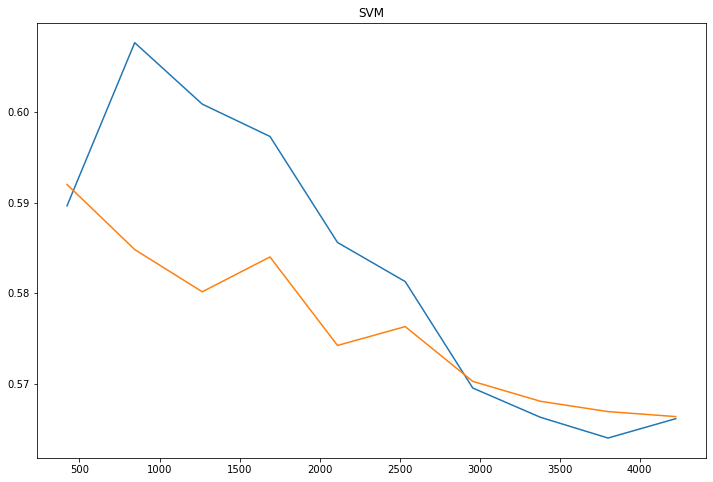

In [66]:
evaluation('SVM',grid_svm.best_estimator_)

AdaBoost Optimization

In [67]:
AdaBoost.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'pipeline', 'adaboostclassifier', 'pipeline__memory', 'pipeline__steps', 'pipeline__verbose', 'pipeline__selectkbest', 'pipeline__selectkbest__k', 'pipeline__selectkbest__score_func', 'adaboostclassifier__algorithm', 'adaboostclassifier__base_estimator', 'adaboostclassifier__learning_rate', 'adaboostclassifier__n_estimators', 'adaboostclassifier__random_state'])

In [68]:
hyper_params_abc = {
     'adaboostclassifier__n_estimators': np.arange(10,300,10),
     'adaboostclassifier__learning_rate': [0.01, 0.05, 0.1, 1],
 }


In [69]:
grid_abc = GridSearchCV(AdaBoost,hyper_params_abc,scoring='recall', cv=4)

grid_abc.fit(X_train,y_train)

print(grid_abc.best_params_)

y_pred = grid_abc.predict(X_test)


{'adaboostclassifier__learning_rate': 1, 'adaboostclassifier__n_estimators': 20}


AdaBoost
[[934 107]
 [177 191]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1041
           1       0.64      0.52      0.57       368

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



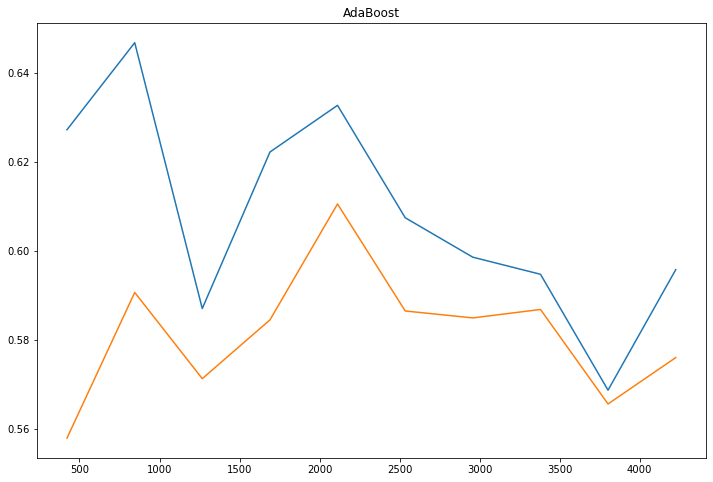

In [70]:
evaluation('AdaBoost',grid_abc.best_estimator_)

KNN Optimization

In [71]:
KNN.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'pipeline', 'standardscaler', 'kneighborsclassifier', 'pipeline__memory', 'pipeline__steps', 'pipeline__verbose', 'pipeline__selectkbest', 'pipeline__selectkbest__k', 'pipeline__selectkbest__score_func', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'kneighborsclassifier__algorithm', 'kneighborsclassifier__leaf_size', 'kneighborsclassifier__metric', 'kneighborsclassifier__metric_params', 'kneighborsclassifier__n_jobs', 'kneighborsclassifier__n_neighbors', 'kneighborsclassifier__p', 'kneighborsclassifier__weights'])

In [72]:
hyper_params_knn = {'kneighborsclassifier__n_neighbors':[4,5,6,7],
              'kneighborsclassifier__leaf_size':[1,3,5],
              }

In [73]:
grid_knn = GridSearchCV(KNN,hyper_params_knn,scoring='recall', cv=4)

grid_knn.fit(X_train,y_train)

print(grid_knn.best_params_)

y_pred = grid_knn.predict(X_test)

{'kneighborsclassifier__leaf_size': 1, 'kneighborsclassifier__n_neighbors': 5}


KNN
[[934 107]
 [177 191]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1041
           1       0.64      0.52      0.57       368

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



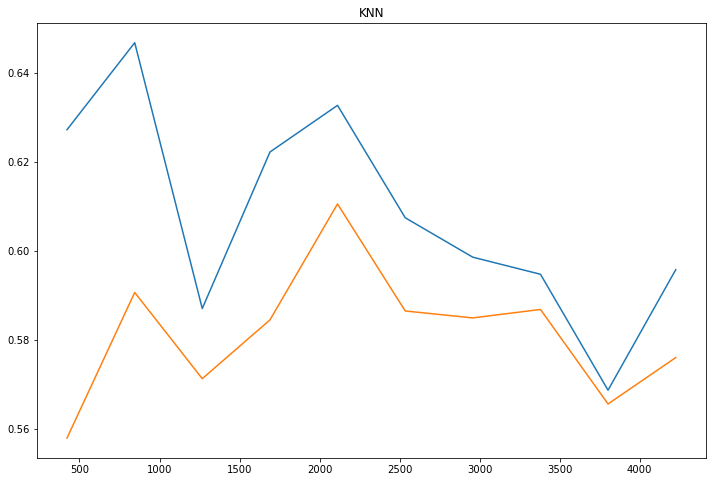

In [74]:
evaluation('KNN',grid_abc.best_estimator_)

#Model selection
The SVM model could have been an interesting model if we had less data.

Logistic Regression has good results, but the Adaboost and KNN models have the best performance with a recall of 0.52 and an f1-score of 0.57.

We will continue our project with the Adaboost model.

Precision Recall Curve for the Adaboost model

In [75]:
precision, recall, threshold = precision_recall_curve(y_test,grid_abc.best_estimator_.decision_function(X_test))

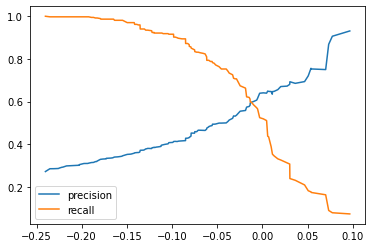

In [76]:
plt.plot(threshold, precision[:-1], label='precision')
plt.plot(threshold, recall[:-1], label='recall')
plt.legend()

Let's choose a threshold at -0.1 in order to get a best recall.

In [77]:
def model_final(model, X, threshold=0) :
    return model.decision_function(X) > threshold

In [78]:
y_pred = model_final(grid_abc.best_estimator_, X_test, threshold=-0.1)

In [79]:
recall_score(y_test,y_pred)

0.9157608695652174

In [80]:
f1_score(y_test, y_pred)

0.5649622799664711

With Adaboost and some optimization elements, we managed to obtain a model able to detect 91% of TELCO's customers who went to churn. Thanks to this type of model, the company could contact these customers in order to propose them to modify their contract.

In [ ]:
#Create a slicer which is used to calculate the week:

ThisWeek = if(weeknum(now) = weeknum(date), "Yes", "No")

#It is however worth noting that if you have a data set that contains dates over several 
    #years it could show more data than required. In this case I would create the below column 
    #and use a Slicer based off of that.

ThisWeek = if(weeknum(now) = weeknum(date && year(now) = year(date), "Yes", "No")